# Cálculo de trayectoria para nave exploratoria lunar

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from scipy import integrate

**a)** Vamos a suponer la Tierra inmóvil y la Luna siguiendo una órbita circular cuya frecuencia angular es $\omega = 2.6617×10^{−6} s^{-1}$. Esto evita integrar la ecuación de la Luna, la cuál es en realidad elíptica.

In [ ]:
ome = 2.6616e-6 # Frecuencia angular de la órbita lunar

**b)** La simulación será realizada en el S.I. de unidades que resulta más conveniente en el caso del
sistema Tierra-Luna. El paso de integración deben ser segundos de vuelo ($h \propto s$), pero se debe
graficar cada 1000 pasos usando animation dado que el viaje a la Luna dura días terrestres.

In [ ]:
G = 6.67e-11    # Constante gravitacional
MT = 5.9736e+24 # Masa de la Tierra
RT = 6.3781e+6  # Radio terrestre
ML = 7.349e+22  # Masa de la Luna
RL = 1.7374e+6  # Radio de la Lunar
d = 3.844e+8    # Distancia Tierra-Luna

**c)** Muestre usando la Figura 1 que la distancia Nave-Luna está dada por:

Para esto, se puede usar la ley del coseno. Sea $\vec{r}(t)$ la posición de la nave, $\vec{d}$ la posición de la Luna y $\vec{r}_L = \vec{r}-\vec{d}$ la distancia Nave-Luna. Entonces, se tendrá

$$ |\vec{r}_L|^2 = |\vec{r}|^2 + |\vec{d}|^2 - 2 \vec{r}\cdot \vec{d} $$
$$ |\vec{r}_L|^2 = |\vec{r}|^2 + |\vec{d}|^2 - 2 |\vec{r}|| \vec{d}| \cos \theta $$

donde $\theta$ es el ángulo entre la posición de la nave y la posición de la Luna, dado por $\theta = \phi(t) - \omega t$. Entonces,

$$ r_L = \sqrt{r^2 + d^2 - 2rd\cos (\phi - \omega t)  } $$

**d)** Usando esta distancia muestre que el Hamiltoniano de la nave está dado por:

Recordemos que para un sistema de $n$ coordenadas canónicas, el Hamiltoniano está dado por

$$ \mathcal{H}  = \sum_{i=1}^n p_i \dot{q}_i - \mathcal{L} $$

A su vez, el Lagrangiano estará dado por 

$$ \mathcal{L} = T + V = \frac{1}{2} m \dot{r}^2 + \frac{1}{2}mr^2 \dot{\phi}^2  + \frac{Gmm_T}{r} + \frac{Gmm_L}{r_L}$$

Los momentos generalizados están dados por 

$$p_r = \frac{\partial L}{\partial \dot{r}} = m\dot{r} $$

$$p_\phi = \frac{\partial L}{\partial \dot{\phi}} = mr^2\dot{\phi} $$

Reemplazando, se tendrá entonces un Lagrangiano en función de estos momentos dado por  

$$  \mathcal{L}  = \frac{p_r^2}{2m} + \frac{p_\phi^2}{2mr^2} + \frac{Gmm_T}{r} + \frac{Gmm_L}{r_L} $$

Y un Hamiltoniano dado por 


$$ \mathcal{H}  = p_r \dot{r} + p_{\phi}\dot{\phi} - \mathcal{L} $$ 
$$ \mathcal{H}  =  \frac{p_r^2}{m} + \frac{p_\phi^2}{mr^2} - \mathcal{L} $$
$$ \mathcal{H}  =  \frac{p_r^2}{m} + \frac{p_\phi^2}{mr^2} - \frac{p_r^2}{2m} - \frac{p_\phi^2}{2mr^2} - \frac{Gmm_T}{r} - \frac{Gmm_L}{r_L} $$
$$ \mathcal{H}  =   \frac{p_r^2}{2m} + \frac{p_\phi^2}{2mr^2} - \frac{Gmm_T}{r} - \frac{Gmm_L}{r_L} $$

**e)** Muestre que las ecuaciones de Hamilton, que son las ecuaciones de movimiento están dadas por:

Las velocidades generalizadas estarán dadas por 

$$ \dot{r} = \frac{\partial \mathcal{H}}{\partial p_r} = \frac{2p_r}{2m} = \frac{p_r}{m} $$
$$ \dot{\phi} = \frac{\partial \mathcal{H}}{\partial p_\phi} = \frac{2p_\phi}{2mr^2} = \frac{p_\phi}{mr^2} $$

A su vez, las derivadas de los momentos generalizados (fuerzas) estarán dadas por

$$ \dot{p}_r = - \frac{\partial \mathcal{H}}{\partial r} = \frac{p_\phi^2}{mr^3}-\frac{Gmm_T}{r^2} - \frac{Gmm_L}{r_L^2} \frac{\partial r_L}{\partial r} $$
Se tiene además que 

$$ \frac{\partial r_L}{\partial r}  = \frac{\partial}{\partial r} \sqrt{r^2 + d^2 - 2rd\cos (\phi - \omega t)  }  = \frac{1}{2r_L} (2r-2d\cos (\phi - \omega t) = \frac{r-d\cos(\phi - \omega t)}{r_L}.$$

Entonces se tiene 

$$ \dot{p}_r = - \frac{\partial \mathcal{H}}{\partial r} = \frac{p_\phi^2}{mr^3} -\frac{Gmm_T}{r^2} - \frac{Gmm_L}{r_L^3}(r-d\cos(\phi - \omega t))$$

Por el otro lado, para el momento generalizado angular se tiene 

$$ \dot{p}_\phi = - \frac{\partial \mathcal{H}}{\partial \phi} = - \frac{Gmm_L}{r_L^2} \frac{\partial r_L}{\partial \phi} $$

Utilizando la derivada

$$ \frac{\partial r_L}{\partial \phi}  = \frac{2rd\sin ( \phi - \omega t)}{2r_L} = \frac{rd \sin (\phi - \omega t)}{r_L} $$

En total se tendrá,

$$ \dot{p}_\phi = - \frac{\partial \mathcal{H}}{\partial \phi} = - \frac{Gmm_L}{r_L^3} rd \sin (\phi - \omega t) $$

**f)** Tenemos que $$\dot{\tilde{r}} = \frac{d}{dt}\left( \frac{r}{d}\right) = \frac{\dot{r}}{d} = \frac{p_r}{md} = \tilde{p}_r.$$ Por otro lado, $$\dot{\phi} = \frac{p_{\phi}}{m r^2} = \frac{p_{\phi}}{m (\tilde{r}d)^2} = \frac{p_{\phi}}{md^2}\frac{1}{\tilde{r}^2} = \frac{\tilde{p}_{\phi}}{\tilde{r}^2}.$$

En cuanto al momento $\tilde{p}_r$, $$\dot{\tilde{p}_r} = \frac{d}{dt}\left( \frac{p_r}{md}\right) = \frac{\dot{p}_r}{md} = \frac{p_\phi^2}{m^2r^3 d} -\frac{Gm_T}{r^2 d} - \frac{Gm_L}{r_L^3}(\tilde{r}-\cos(\phi - \omega t)).$$ Recordando que $\tilde{p}_\phi = p_\phi/md$, $$\frac{p_\phi^2}{m^2r^3 d} = \left(\frac{p_\phi}{md^2}\right)^2 \frac{1}{(r/d)^3} = \frac{\tilde{p}_\phi}{\tilde{r}^3},$$ se obtiene $$\dot{\tilde{p}_r} = \frac{\tilde{p}_\phi}{\tilde{r}^3} - \frac{Gm_T}{d^3} \left\{ \frac{1}{(r/d)^2} + \frac{m_L}{(r_L/d)^3 m_T}[\tilde{r}-\cos(\phi-\omega t)]\right\} = \frac{\tilde{p}_\phi}{\tilde{r}^3} - \Delta \left\{ \frac{1}{\tilde{r}^2} + \frac{\mu}{(r_L/d)^3}[\tilde{r}-\cos(\phi-\omega t)]\right\}.$$

Observe que $$r_L/d = \sqrt{1+(r/d)^2-2r\cos(\phi-\omega t)/d} = \sqrt{1+\tilde{r}^2-2\tilde{r}\cos(\phi-\omega t)} = \tilde{r}'.$$ Esto permite ver que $$\dot{\tilde{p}_r} = \frac{\tilde{p}_\phi}{\tilde{r}^3} - \Delta \left\{ \frac{1}{\tilde{r}^2} + \frac{\mu}{\tilde{r}'^3}[\tilde{r}-\cos(\phi-\omega t)]\right\}. $$

Finalmente, $$\dot{\tilde{p}_\phi} = \frac{d}{dt}\left( \frac{p_\phi}{md^2}\right) = \frac{\dot{p}_\phi}{md^2} = - \frac{Gm_L}{r_L^3} \tilde{r} \sin (\phi - \omega t) = - \frac{G m_T}{d^3}\frac{m_L}{m_T}\frac{1}{(r/d)^3} \tilde{r} \sin (\phi - \omega t) = -\frac{\Delta \mu}{\tilde{r}'^3} \tilde{r} \sin (\phi - \omega t).$$


### Método para resolver la ODE del cohete

Para encontrar una solución numérica al problema, usamos el algoritmo de Runge-Kutta de orden 4 (RK4).

In [2]:
def RK4 (f, r0, t):
    """
    Implementación del algoritmo de Runge-Kutta de orden 4 para resolver sistemas
    de ecuaciones diferenciales.

    Args:
    f: función de la ED y'=f(t,y)
    r0: condición inicial
    t: discretización uniformemente espaciada del intervalo temporal.
    """
    h = t[1]-t[0]
    y = r0
    solution = np.array(r0)

    for i in range(1,len(t)):
        k1 = f(t[i-1],y)
        k2 = f(t[i-1]+0.5*h, y + 0.5*h*k1)
        k3 = f(t[i-1]+0.5*h, y + 0.5*h*k2)
        k4 = f(t[i-1]+h, y + h*k3)

        y += h*(k1+2*k2+2*k3+k4)/6.
        solution = np.vstack([solution, y])

    return solution

### Resolución del problema

Primero, se definen las constantes del problema.

In [3]:
G = 6.67e-11    # Constante gravitacional
MT = 5.9736e+24 # Masa de la Tierra
RT = 6.3781e+6  # Radio terrestre
ML = 7.349e+22  # Masa de la Luna
RL = 1.7374e+6  # Radio de la Lunar
d = 3.844e+8    # Distancia Tierra-Luna
ome = 2.6616e-6 # Frecuencia angular de la órbita lunar

La implementación del algoritmo RK4 que hemos desarrollado permite resolver sistemas de ODEs de la forma $$\mathbf{x}' = f(t,\mathbf{x}).$$ Solo es necesario definir la función del lado derecho.

In [4]:
def f(t,x):
    """
    t: tiempo
    x: vector de cuatro componentes.
    --- x[0]: r/d
    --- x[1]: phi
    --- x[2]: momento conjugado a x[0]
    --- x[3]: momento conjugado a x[1]
    """
    cs = np.cos(x[1]-ome*t)
    r_ = np.sqrt(1 + x[0]**2 - 2*x[0]*cs)
    Delta = G*MT/(d**3)
    mu = ML/MT
    d0 = x[2]
    d1 = x[3]/ (x[0]**2)
    d2 = (x[3]**2) / (x[0])**3 - Delta*(x[0]**(-2) + mu/(r_**3)*(x[0]-cs))
    d3 = -Delta*mu*x[0] / (r_**3) *np.sin(x[1]-ome*t)
    
    return np.array([d0, d1, d2, d3])

In [5]:
def ReduceSolution(solution, k = 1000):
    redux = solution[0]
    for i, point in enumerate(solution[1:]):
        if i%k == 0:
            redux = np.vstack([redux, point])
            
    return redux


def ReduceTime(t, k = 1000):
    redux = []
    
    for i, tt in enumerate(t):
        if i%k == 0:
            redux.append(tt)
            
    return np.array(redux)

In [6]:
v0 = 11.2e+3/d
theta = np.pi/4
phi = np.pi/3.4

P_r0 = v0*np.cos(theta-phi)
P_phi0 = RT/d * v0 * np.sin(theta-phi)

t = np.linspace(0,520000, 520001)
r0 = np.array([RT/d, theta, P_r0, P_phi0])

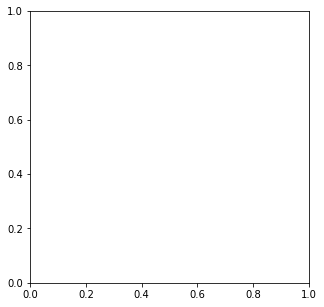

In [7]:
fig, ax = plt.subplots(figsize=(5,5))

def init():
    ax.set_xlim(-0.15,1.25)
    ax.set_ylim(-0.15,1.25)
    Earth = plt.Circle((0,0), radius = RT/d)
    ax.add_patch(Earth)

def update_plot(i):
    ax.clear()
    init()

    point = R_sol[i]

    xL = np.cos(ome*R_t[i])
    yL = np.sin(ome*R_t[i])

    x = point[0]*np.cos(point[1])
    y = point[0]*np.sin(point[1])

    moon = plt.Circle((xL,yL), fill=True, color='k', radius = 0.01)
    ax.add_patch(moon)
    ax.scatter(x,y, marker='.', color='paleturquoise')

In [8]:
sol = RK4(f, r0, t)

In [9]:
R_sol = ReduceSolution(sol, 1000)
R_t = ReduceTime(t, 1000)

In [10]:
num_frames = len(R_t)
anim = animation.FuncAnimation(fig, update_plot, frames=num_frames)
anim.save('moon.gif', fps=30)

MovieWriter ffmpeg unavailable; using Pillow instead.


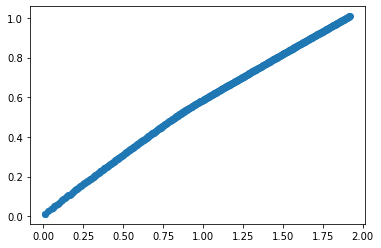

In [11]:
xN = R_sol[:,0]*np.cos(R_sol[:,1])
yN = R_sol[:,0]*np.sin(R_sol[:,1])

plt.scatter(xN, yN)
plt.show()